<h1>Checking & Loading the Collated Dataset</h1>

The Dataset has been collated and arranged in the <em>'./data'</em> directory under <em>'mnist' & 'speech'</em> where,
* <b>'mnist'</b> directory contains the MNIST digit dataset for respective languages in the form of <em>'.npz'</em> files
* <b>'speech'</b> directory contains speaker speech recordings for each speaker collated in <em>'.npz'</em> files

The <b>MNIST</b> data has been obtained from [MNIST-MIX](https://github.com/jwwthu/MNIST-MIX) dataset. Further the collated speech <em>.npz</em> files have been obtained from the [Free Spoken Digit Dataset](https://github.com/Jakobovski/free-spoken-digit-dataset) which has audio recordings of spoken digits if 6 speakers in English.<br>
In the <em>'speech'</em> directory, the recordings <em>(.wav files)</em> have been organized in to <em>.npz</em> files listed according to speakers.

Importing relevant modules & libraries.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, IterableDataset, DataLoader
from itertools import cycle, islice

# change the path pointer to parent directory in order to load relevant modules
currentDir = os.path.abspath('')
sys.path.append( os.path.dirname(currentDir) )

from object_encapsulate import objectIndividual

<h4>Instantiate data objects by passing different combinations of MNIST languages as arguments</h4>

In [2]:
"""
    create Class object abstraction for different
    combinations of Languages (MNIST) & corresponding
    Speech in English for respective digits. 
"""

person1 = objectIndividual('Bangla', 'Arabic') # First Lang. Bangla / Second Lang. Arabic
person2 = objectIndividual('Arabic', 'Devanagari') # First Lang. Arabic / Second Lang. Devanagari
person3 = objectIndividual('Bangla', 'Urdu') # First Lang. Bangla / Second Lang. Urdu
person4 = objectIndividual('Urdu', 'Farsi') # First Lang. Urdu / Second Lang. Farsi
person5 = objectIndividual('Bangla', 'Bangla') # First Lang. Bangla / Second Lang. Bangla

<em>In order to inspect all the components of the instantiated data object, we create a class abstraction which loads the data object & retrieves a sample of it.</em>

In [3]:
class dataset( IterableDataset ):
    # class inherit from torch.utils.data.IterableDataset
    
    def __init__(self, p):
        # initialize the data attribute of the passed Iterable Dataset object
        self.data = p
        
    def parseData(self):
        # parse the data with the respective data attributes of the instantiated object & return a sample.
        for sample in self.data._sample(self.data.mnistFirst_X_train, self.data.mnistSecond_X_train, self.data.speech_X_train, 
                                        self.data.mnistFirst_y_train, self.data.mnistSecond_y_train, self.data.speech_y_train
                                       ):
            yield sample
            
    def __iter__(self):
        # redifine __iter__ method with the defined 'parseData' method
        return self.parseData()

Loop through the instantiated data objects & inspect the corresponding sampled dataset attributes.

The Batch ID: 0 | The corresponding label / digit (Y) : 8 
------> The Digit corresponding to First MNIST Language: Bangla


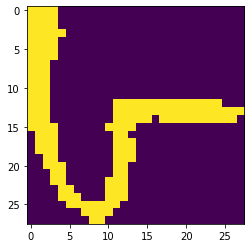

------> The Digit corresponding to Second MNIST Language: Arabic


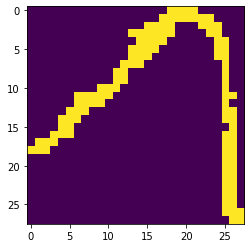

------> Visualized Speech Tensor: 


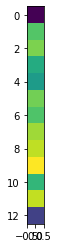

------> The correspondin Label Tensor: 


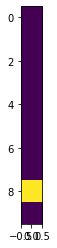

----------------------------------------------------------------------------------------------

The Batch ID: 0 | The corresponding label / digit (Y) : 2 
------> The Digit corresponding to First MNIST Language: Arabic


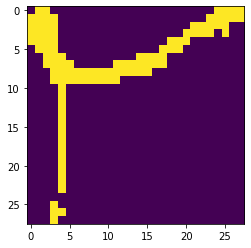

------> The Digit corresponding to Second MNIST Language: Devanagari


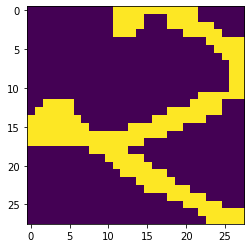

------> Visualized Speech Tensor: 


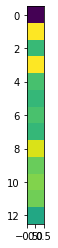

------> The correspondin Label Tensor: 


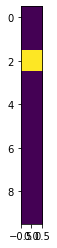

----------------------------------------------------------------------------------------------

The Batch ID: 0 | The corresponding label / digit (Y) : 0 
------> The Digit corresponding to First MNIST Language: Bangla


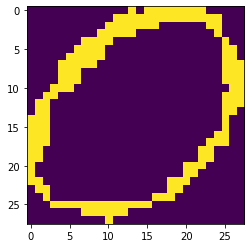

------> The Digit corresponding to Second MNIST Language: Urdu


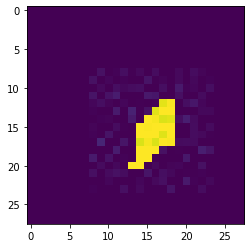

------> Visualized Speech Tensor: 


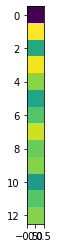

------> The correspondin Label Tensor: 


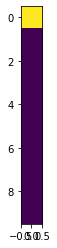

----------------------------------------------------------------------------------------------

The Batch ID: 0 | The corresponding label / digit (Y) : 6 
------> The Digit corresponding to First MNIST Language: Urdu


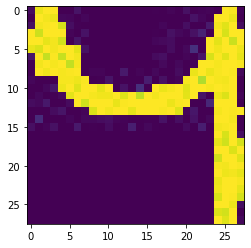

------> The Digit corresponding to Second MNIST Language: Farsi


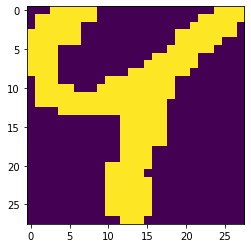

------> Visualized Speech Tensor: 


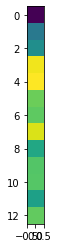

------> The correspondin Label Tensor: 


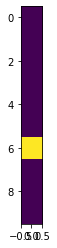

----------------------------------------------------------------------------------------------

The Batch ID: 0 | The corresponding label / digit (Y) : 6 
------> The Digit corresponding to First MNIST Language: Bangla


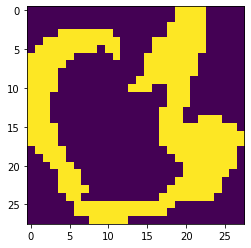

------> The Digit corresponding to Second MNIST Language: Bangla


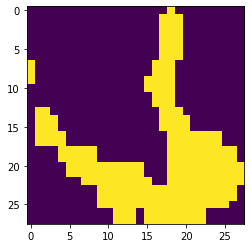

------> Visualized Speech Tensor: 


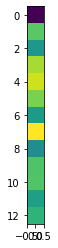

------> The correspondin Label Tensor: 


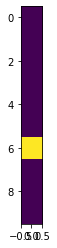

----------------------------------------------------------------------------------------------



In [4]:
personObjectList = [ person1, person2, person3, person4, person5 ]

#instantiate data Object & display data features => first MNIST language, second MNIST language, speech

def dispData( dataObject ):

    instantiateData = dataset( dataObject ) # intstantiate the data class
    loadedData = DataLoader( instantiateData, batch_size = 1 )

    for batchID, ( ( mnistFirst, mnistSecond, speech ), labelY ) in enumerate( loadedData ):
        # Only Iterate Once
        print( 'The Batch ID: {} | The corresponding label / digit (Y) : {} '.format( batchID, np.argmax( labelY ) ) )
        print('------> The Digit corresponding to First MNIST Language: {}'.format( dataObject.mnistLang1 ) )
        plt.imshow(mnistFirst.squeeze())
        _ = plt.show()
        print('------> The Digit corresponding to Second MNIST Language: {}'.format( dataObject.mnistLang2 ) )
        plt.imshow(mnistSecond.squeeze())
        _ = plt.show()
        print('------> Visualized Speech Tensor: ')
        plt.imshow( np.expand_dims( speech.squeeze(), axis = -1 ) )
        _ = plt.show()
        print("------> The correspondin Label Tensor: ")
        plt.imshow( np.expand_dims( labelY.squeeze(), axis = -1 ) )
        _ = plt.show()
        print('----------------------------------------------------------------------------------------------\n')
        break
        
for p in personObjectList:
    dispData( p )